# <p style="text-align: center;">Basic findings about the CPD ISR data set</p>
## <p style="text-align: center;">(Jan 2018 to Dec 2019)</p>

In [59]:
# Python 3.8.0
import io
import json
import random
import numpy as np
import pandas as pd

from IPython.display import Image

import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

pd.options.display.max_columns = None

In [2]:
# Load Data
df_main = pd.read_csv('ISR-1-Jan-2018--31-Dec-2019-Juv-Redacted.csv',
                     dtype={'DISTRICT': str, 'BEAT': str})
df_dict = pd.read_csv('ISR-Data-Dictionary-2.csv')
df_dict = df_dict.dropna()

D:\Python37.4\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning:

Columns (12,34,97,98,99,100,107,108,109,143,145,147) have mixed types.Specify dtype option on import or set low_memory=False.



### 1. Total Number of ISR by Police Beats and Districts

In [3]:
# Load GeoJson data
with open('Boundaries - Police Beats (current).geojson', 'r') as f:
    geodata_beat = json.load(f)
with open('Boundaries - Police Districts (current).geojson', 'r') as f:
    geodata_district = json.load(f)

In [4]:
df_tn_b = df_main['BEAT'].value_counts()
df_tn_d = df_main['DISTRICT'].value_counts()

In [5]:
df_tn_b = pd.DataFrame(data=zip(df_tn_b.index, df_tn_b.values), columns=['beat_num', 'isr_num'])
df_tn_d = pd.DataFrame(data=zip(df_tn_d.index, df_tn_d.values), columns=['dist_num', 'isr_num'])
df_tn_d['dist_num'] = df_tn_d['dist_num'].astype(int).astype(str)

In [6]:
max(df_tn_d['isr_num'])

27850

In [58]:
# Beat
fig = go.Figure(go.Choroplethmapbox(featureidkey='properties.beat_num',geojson=geodata_beat, locations=df_tn_b['beat_num'], z=df_tn_b['isr_num'],
                                    colorscale="reds", zmin=0, zmax=6000,
                                    marker_opacity=0.7, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=9.1, mapbox_center = {"lat": 41.823832, "lon": -87.623177})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
img_bytes = fig.to_image(format="png")

### <p style="text-align: center;">Total Number of ISR of yr 2018-2019 by Beats</p>

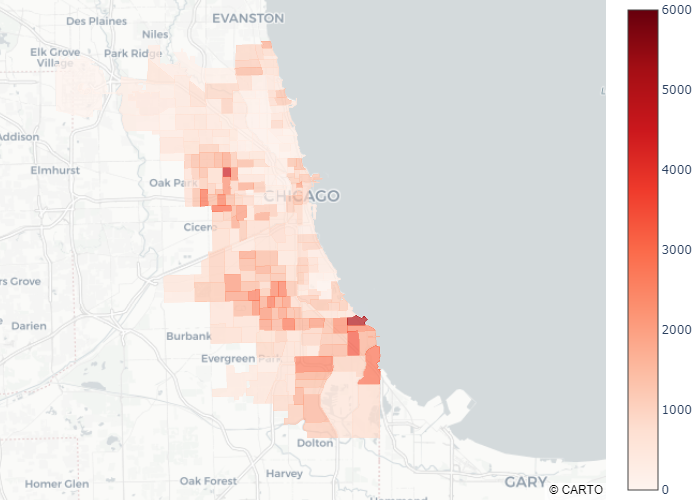

In [60]:
Image(img_bytes)

In [71]:
# District
fig = go.Figure(go.Choroplethmapbox(featureidkey='properties.dist_num',geojson=geodata_district, locations=df_tn_d['dist_num'], z=df_tn_d['isr_num'],
                                    colorscale="reds", zmin=0, zmax=30000,
                                    marker_opacity=0.7, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=9.1, mapbox_center = {"lat": 41.823832, "lon": -87.623177})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
img_bytes = fig.to_image(format="png")

### <p style="text-align: center;">Total Number of ISR of yr 2018-2019 by Districts</p>

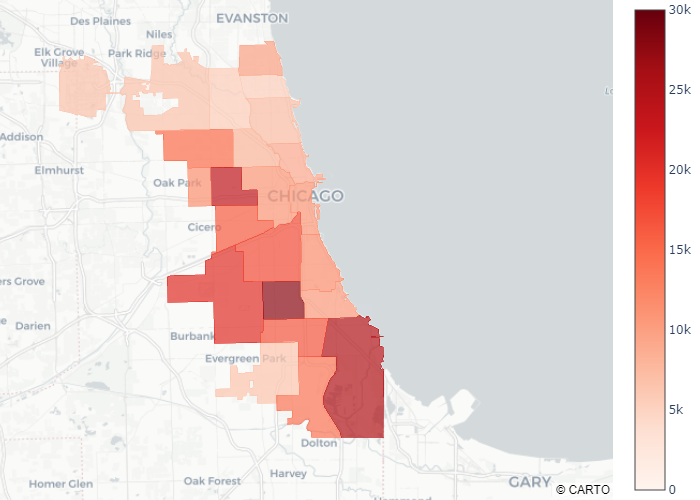

In [72]:
Image(img_bytes)

In [69]:
geodata_district['features'][0]

{'type': 'Feature',
 'properties': {'dist_label': '17TH', 'dist_num': '17'},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-87.71067089391354, 41.997365655369435],
     [-87.71066884721016, 41.99729359357709],
     [-87.71066053080999, 41.997225765680135],
     [-87.7106465308153, 41.99711482608049],
     [-87.71063495001478, 41.997076371664974],
     [-87.71063126951208, 41.99703491309021],
     [-87.71063173430669, 41.99702111355831],
     [-87.71064107245383, 41.99701057121908],
     [-87.71064185160014, 41.99700613033399],
     [-87.7106289441022, 41.996790558671314],
     [-87.71062465241883, 41.996702446053355],
     [-87.71058348654792, 41.996385460641214],
     [-87.71054282734032, 41.99608815353509],
     [-87.71051198467136, 41.99582931932399],
     [-87.71049568642124, 41.9957277500868],
     [-87.71047944028429, 41.99566956668427],
     [-87.7104724803783, 41.99562902174855],
     [-87.71046262848955, 41.9955716466941],
     [-87.71042659582001, 41.995388495676